In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import the libraries and deps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

In [4]:
# Load data
path = "/content/drive/MyDrive/CodeClause/"
iris_data = pd.read_csv(f"{path}Iris.csv", delimiter=",")

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Insights so far
- All the columns except for the species name are numerical data
- The dataset does not contain any null values
- The species columns is a categorical data

Judging from the data, the species is a classification problem based of the rest of the predictor values.

In [6]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Statistical Insights

- Mean of the different lengths
- Count of the columns
- Minimum (Tells the various parts minimum lengths of the flower)
- Maximum (Tells the various parts maximum lengths of the flower)
- Standard Deviation (variation from the mean, outliers)

In [7]:
# Checking Duplicates
iris_data[iris_data.duplicated()] # none found

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [8]:
# Check balance of the classes
iris_data['Species'].value_counts() # balanced - all classes have equal entries

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Study or Look for
- Variation in different lengths in different species
- Min, Max, Mean of the different species
-

# Data Visualization

<Axes: title={'center': 'Species Count'}, xlabel='Species', ylabel='count'>

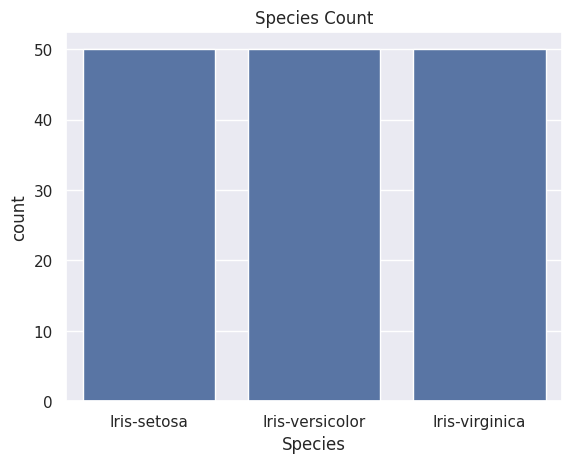

In [9]:
plt.title("Species Count")
sns.countplot(x=iris_data.Species)

## Insight
The dataset is balanced with the classes and the number of entries in each

# Univariate Analysis

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

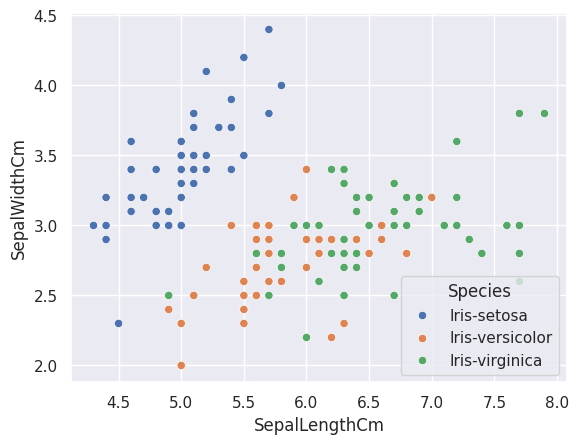

In [10]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris_data)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

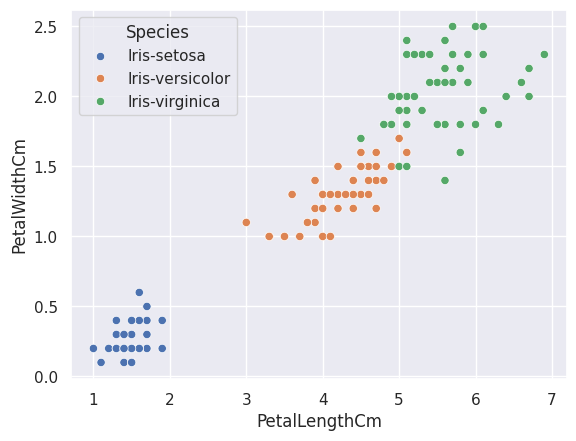

In [11]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris_data)

# Bi-variate Analysis


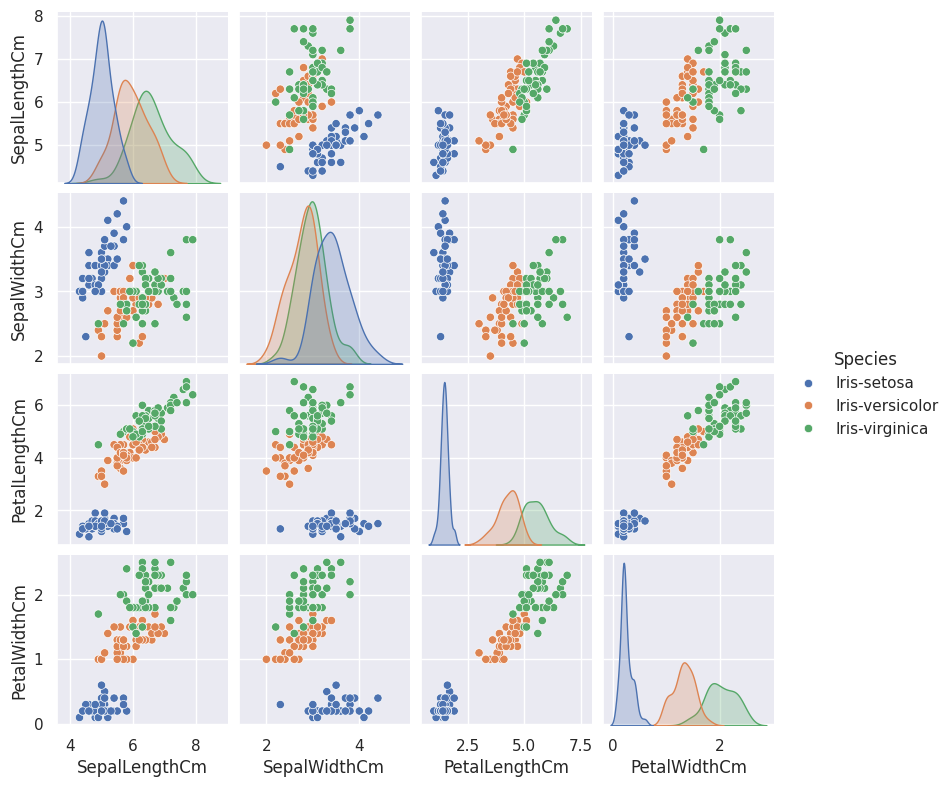

In [12]:
sns.pairplot(iris_data.drop(['Id'], axis=1), hue='Species', height=2)

## Insights

- Iris setosa has smallest petal width, petal length, sepal length , and the largest sepal width
- Iris vesicolor  has the medium petal width, petal length, sepal length and smallest sepal width
- Iris virginica has the largest petal width, petal length, sepal length and medium sepal width

# Correlation

<Axes: >

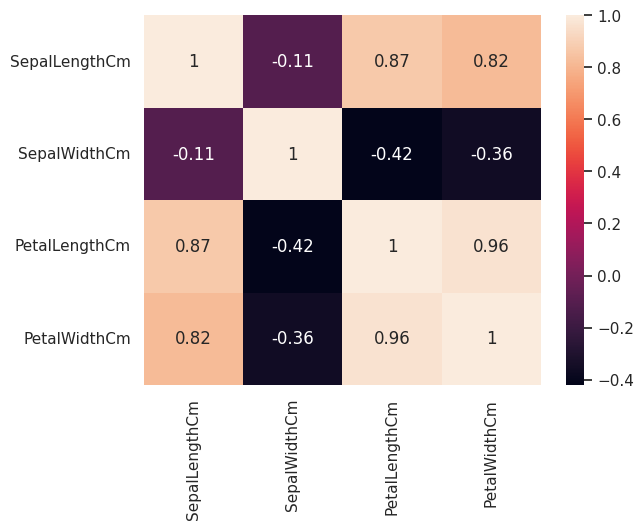

In [13]:
sns.heatmap(iris_data.drop(['Species', 'Id'], axis=1).corr(), annot=True)

## Correlation
- Petal length and Petal width have high correlation
- Petal length and Sepal length have good correlation
- Petal width and Sepal length have good correlation

In [14]:
iris_data.groupby(['Species']).agg(['mean', 'median'])

Id        SepalLengthCm        SepalWidthCm         \
                  mean median          mean median         mean median   
Species                                                                  
Iris-setosa       25.5   25.5         5.006    5.0        3.418    3.4   
Iris-versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
Iris-virginica   125.5  125.5         6.588    6.5        2.974    3.0   

                PetalLengthCm        PetalWidthCm         
                         mean median         mean median  
Species                                                   
Iris-setosa             1.464   1.50        0.244    0.2  
Iris-versicolor         4.260   4.35        1.326    1.3  
Iris-virginica          5.552   5.55        2.026    2.0

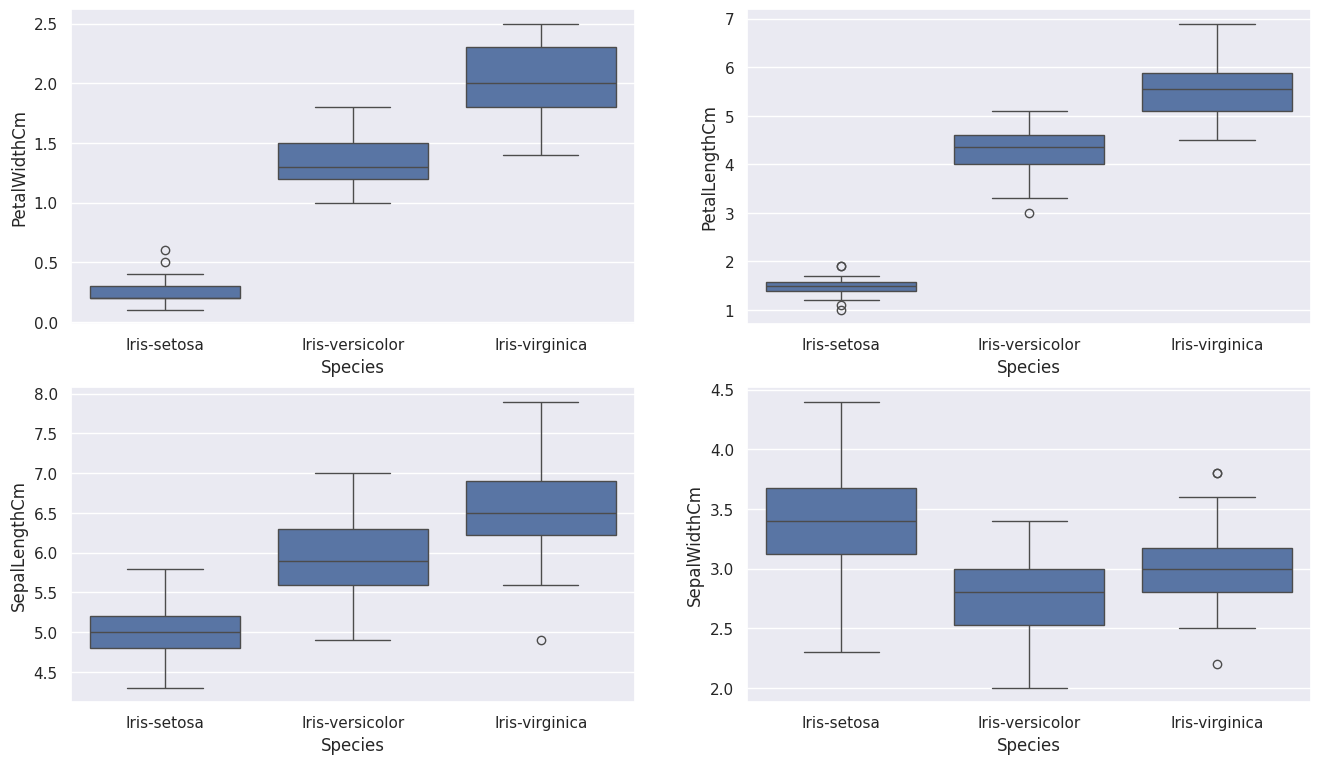

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y="PetalWidthCm", x= "Species", data=iris_data, orient='v' , ax=axes[0, 0])
sns.boxplot( y="PetalLengthCm", x= "Species", data=iris_data, orient='v' , ax=axes[0, 1])
sns.boxplot( y="SepalLengthCm", x= "Species", data=iris_data, orient='v' , ax=axes[1, 0])
sns.boxplot( y="SepalWidthCm", x= "Species", data=iris_data, orient='v' , ax=axes[1, 1])
plt.show()

- Iris setosa has smaller features which are less distributed
- Iris versicolor has average features which are averagely distributed
- Iris virginica has larger features which are highly distributed

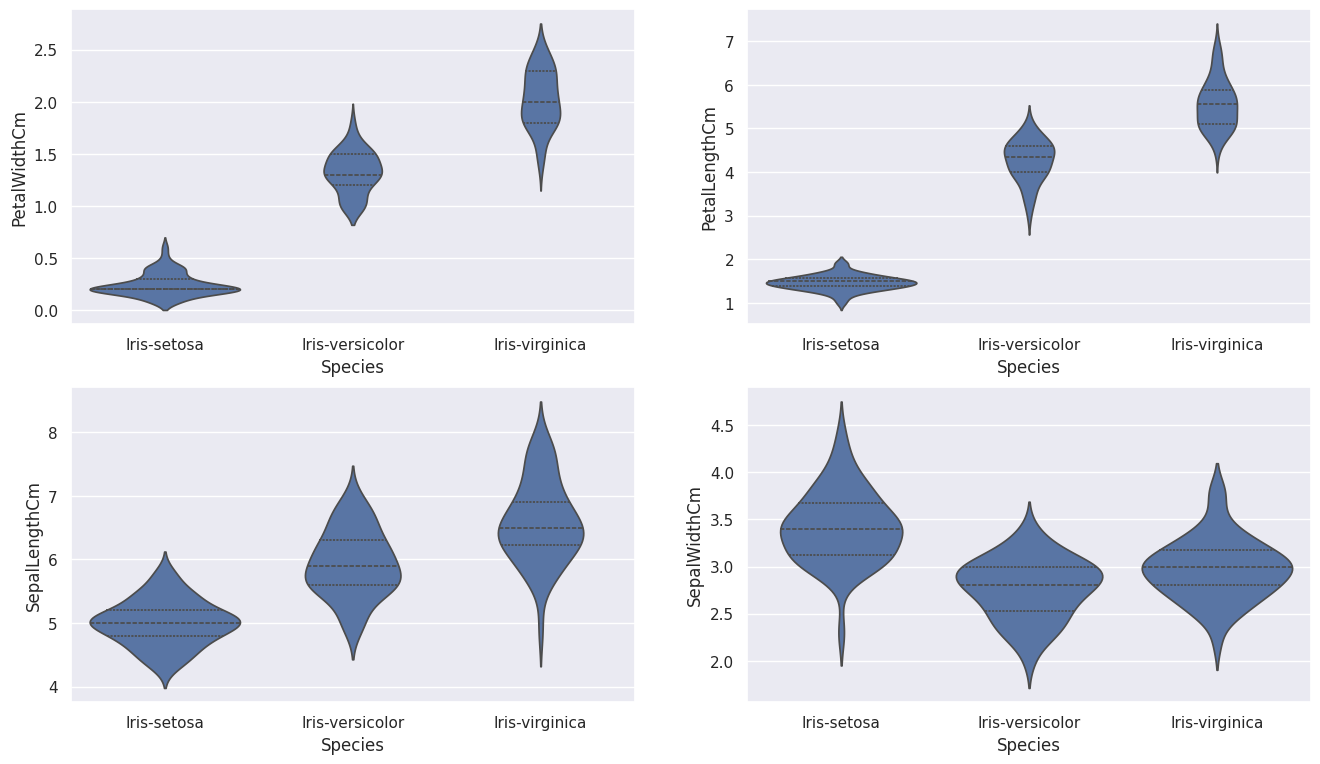

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot( y="PetalLengthCm", x= "Species", data=iris_data, orient='v' , ax=axes[0, 1],inner='quartile')
sns.violinplot( y="PetalWidthCm", x= "Species", data=iris_data, orient='v' , ax=axes[0, 0],inner='quartile')
sns.violinplot( y="SepalLengthCm", x= "Species", data=iris_data, orient='v' , ax=axes[1, 0],inner='quartile')
sns.violinplot( y="SepalWidthCm", x= "Species", data=iris_data, orient='v' , ax=axes[1, 1],inner='quartile')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

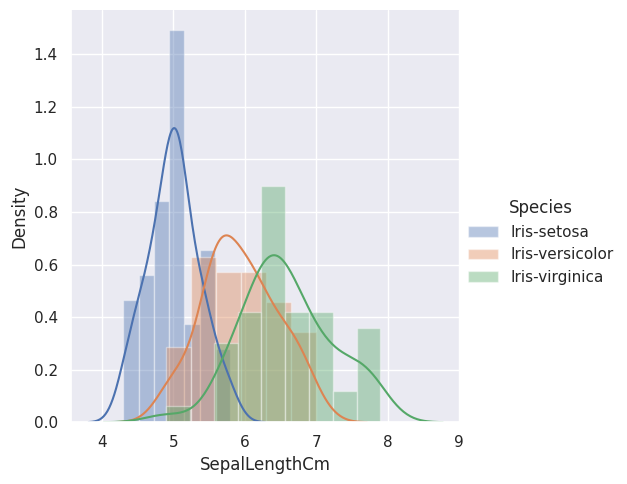

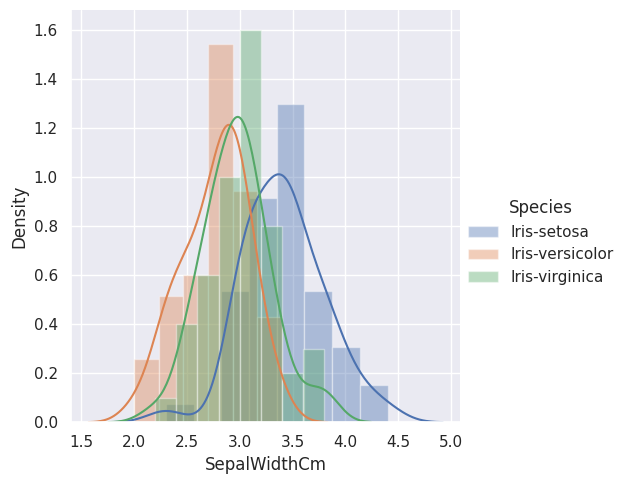

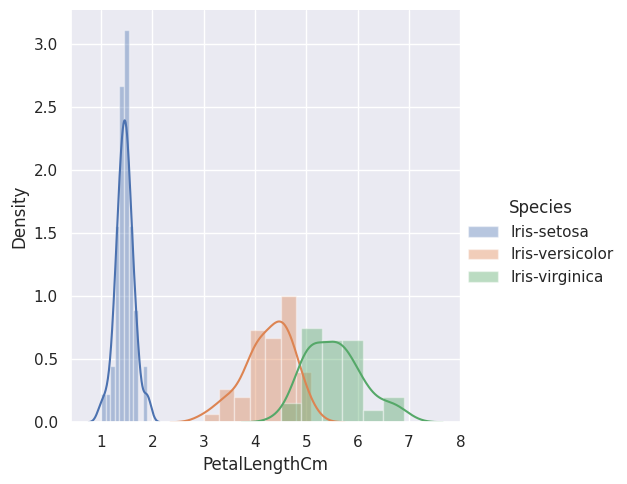

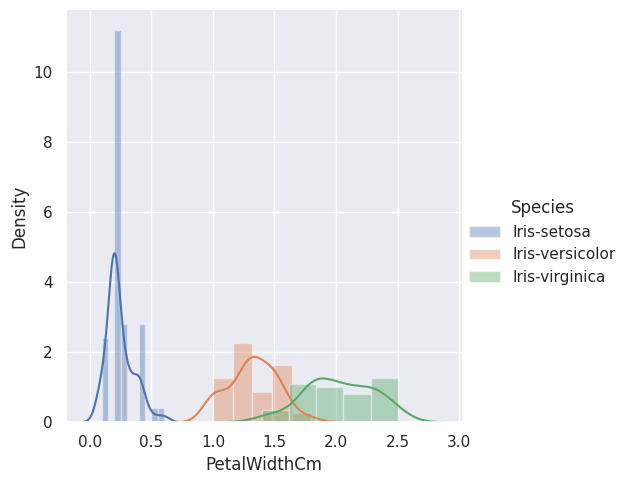

In [17]:
sns.FacetGrid(iris_data, hue="Species", height=5) \
.map(sns.distplot, "SepalLengthCm") \
.add_legend()

sns.FacetGrid(iris_data, hue="Species", height=5) \
.map(sns.distplot, "SepalWidthCm") \
.add_legend()

sns.FacetGrid(iris_data, hue="Species", height=5) \
.map(sns.distplot, "PetalLengthCm") \
.add_legend()

sns.FacetGrid(iris_data, hue="Species", height=5) \
.map(sns.distplot, "PetalWidthCm") \
.add_legend()
plt.show()

## Distribution Insights


- For Sepal Length, there is a huge amount of overlapping.
- For Sepal Width also, there is a huge amount of overlapping.
- For Petal Length, there is a very little amount of overlapping.
- For Petal Width also, there is a very little amount of overlapping.

